In [1]:
%pip install pandas
%pip install numpy
%pip install faker
%pip install dash==2.14.2 jupyter-dash==0.4.2
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from faker import Faker
import dash
from dash import html, dcc
from dash.dependencies import Input,Output
import matplotlib as mpl 
import matplotlib.pyplot as plt
import random

In [8]:
from jupyter_dash import JupyterDash
from dash import dcc,html
from dash.dependencies import Input,Output
import plotly.express as px 

In [ ]:
#Importing differnt datas and combining them into one data. Note, I am using fake data including fake name.  

In [10]:
stores=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Stores.csv")
stores.head(1)

,Store_ID,Brand,State,Zipcode,Store_Years_Open,Owner_ID
0,STORE_0,Benjamin Franklin,NY,29767,4,OWN_161


In [11]:
owner=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Owners.csv")
owner.head(1)

,Owner_ID,Owner_Sex,Owner_Store_Count,Used_Government_Loan,Owner_Entity_Type
0,OWN_0,Male,1,Yes,Corporation


In [13]:
fake=Faker()
name=[fake.name() for _ in range(250)]
company=[fake.company() for _ in range(250)]

In [14]:
owner["Owner_Name"]=name
owner["Compnay_Name"]=company
owner.head(1)

,Owner_ID,Owner_Sex,Owner_Store_Count,Used_Government_Loan,Owner_Entity_Type,Owner_Name,Compnay_Name
0,OWN_0,Male,1,Yes,Corporation,James Crawford,Wood-Lopez


In [15]:
rev=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Revenue.csv")

rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag
0,STORE_0,756167,420498,75552,Increasing


In [16]:
pay=pd.read_csv(r"C:\Users\silve\Desktop\Data Science\Projects\Trade Franchises\Meta Data\Raw data\Payments.csv")
pay.head(1)

,Store_ID,Missed_Payments_12mo,Missed_Payments_6mo,Missed_Payments_3mo,Initial_Fee_Paid,Initial_Fee_Remaining,Initial_Fee_On_Schedule,Royalty_Paid_Expected,Royalty_Paid_Actual,Marketing_Paid_Expected,Marketing_Paid_Actual,Min_Royalty_Biweekly,Missed_Marketing_Payment_Streak
0,STORE_0,2,1,1,29850,10000,Yes,19046,750,900,6000,750,2


In [19]:
rev["Owner_ID"]=stores["Owner_ID"]

In [ ]:
#adding owner data and comapny data to rev by using owner_id

In [18]:
for n in range(len(rev["Owner_ID"])):
    temp=rev.iloc[n,5]
    m=0
    while m<599:
        temp2=owner.iloc[m,0]
        if temp==temp2:
            rev.loc[n,"Owner_Name"]=owner.iloc[m,5]
            rev.loc[n,"Company_Name"]=owner.iloc[m,6]
            m=600
        else:
            m=m+1
rev.head(1)
               

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag,Owner_ID,Owner_Name,Company_Name
0,STORE_0,756167,420498,75552,Increasing,OWN_161,Elizabeth Mills,"Gaines, Martinez and Allen"


In [ ]:
#adding state and brand to rev

In [20]:
rev["Brand"]=stores["Brand"]
rev["State"]=stores["State"]
rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag,Owner_ID,Owner_Name,Company_Name,Brand,State
0,STORE_0,756167,420498,75552,Increasing,OWN_161,Elizabeth Mills,"Gaines, Martinez and Allen",Benjamin Franklin,NY


In [21]:
rev["Total_Revenue_month"]=pay["Royalty_Paid_Actual"]*2
rev["Total_Revenue_current"]=pay["Royalty_Paid_Actual"]
rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag,Owner_ID,Owner_Name,Company_Name,Brand,State,Total_Revenue_month,Total_Revenue_current
0,STORE_0,756167,420498,75552,Increasing,OWN_161,Elizabeth Mills,"Gaines, Martinez and Allen",Benjamin Franklin,NY,1500,750


In [ ]:
# the fake data I have needs to be reorderd. 3 month revenue cannot be greater than 12mo rev. 

In [23]:

temp_12m=rev["Total_Revenue_12mo"].copy()
temp_6m=rev["Total_Revenue_6mo"].copy()
temp_3m=rev["Total_Revenue_3mo"].copy()

for n in range(len(rev["Store_ID"])):
    t12=temp_12m[n]
    t6=temp_6m[n]
    t3=temp_3m[n]
    temp=[t12,t6,t3]
    temp.sort()  
    temp_12=temp[2]
    temp_6=temp[1]
    temp_3=temp[0]
    temp_12m[n]=temp_12
    temp_6m[n]=temp_6
    temp_3m[n]=temp_3
    temp=pd.NA

rev["Total_Revenue_12mo"]=temp_12m
rev["Total_Revenue_6mo"]=temp_6m
rev["Total_Revenue_3mo"]=temp_3m
rev.head(1)

,Store_ID,Total_Revenue_12mo,Total_Revenue_6mo,Total_Revenue_3mo,Revenue_Trend_Flag,Owner_ID,Owner_Name,Company_Name,Brand,State,Total_Revenue_month,Total_Revenue_current
0,STORE_0,756167,420498,75552,Increasing,OWN_161,Elizabeth Mills,"Gaines, Martinez and Allen",Benjamin Franklin,NY,1500,750


In [ ]:
# creating new list based on sorting values. ex. top 12 lists contain sorted values based on 12 month rev. 

In [24]:
top12=rev.sort_values("Total_Revenue_12mo", ascending=False)
top6=rev.sort_values("Total_Revenue_6mo", ascending=False)
top3=rev.sort_values("Total_Revenue_3mo", ascending=False)
topm=rev.sort_values("Total_Revenue_month", ascending=False)
topc=rev.sort_values("Total_Revenue_current", ascending=False)

In [25]:
bottom12=rev.sort_values("Total_Revenue_12mo", ascending=True)
bottom6=rev.sort_values("Total_Revenue_6mo", ascending=True)
bottom3=rev.sort_values("Total_Revenue_3mo", ascending=True)
bottomm=rev.sort_values("Total_Revenue_month", ascending=True)
bottomc=rev.sort_values("Total_Revenue_current", ascending=True)

In [ ]:
# Visualizing the data. the below object creats bar charts,pie charts, and other chart to show the data. 

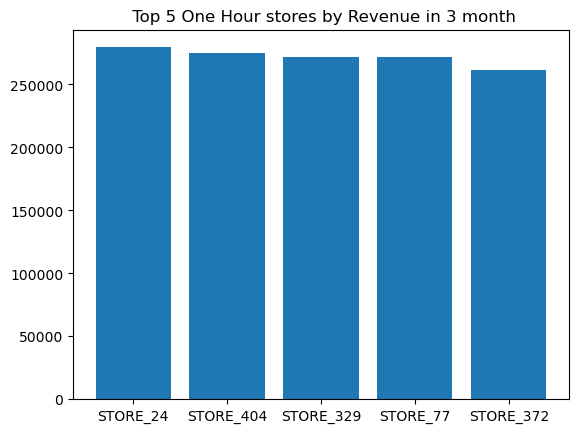

24     279537
404    274809
329    272139
77     271609
372    261420
Name: Total_Revenue_3mo, dtype: int64


In [29]:
def brandtop(state,time):
    topp=rev
    if time==1:
        topp=top12
        name="Total_Revenue_12mo"
        title=f" Top 5 {state} stores by Revenue in 12 month"
    if time==2:
        topp=top6
        name="Total_Revenue_6mo"
        title=f" Top 5 {state} stores by Revenue in 6 month"
    if time==3:
        topp=top3
        name="Total_Revenue_3mo"
        title=f" Top 5 {state} stores by Revenue in 3 month"
    if time==4:
        topp=topm
        name="Total_Revenue_month"
        title=f" Top 5 {state} stores by Revenue in 1 month"
    if time==5:
        topp=topc
        name="Total_Revenue_current"
        title=f" Top 5 {state} stores by Revenue currently"
    topp=topp[topp["Brand"]==state]
    topp=topp.head()
    plt.bar(topp["Store_ID"],topp[name])
    plt.title(title)
    plt.show()
    print(topp[name])


brandtop("One Hour",3)

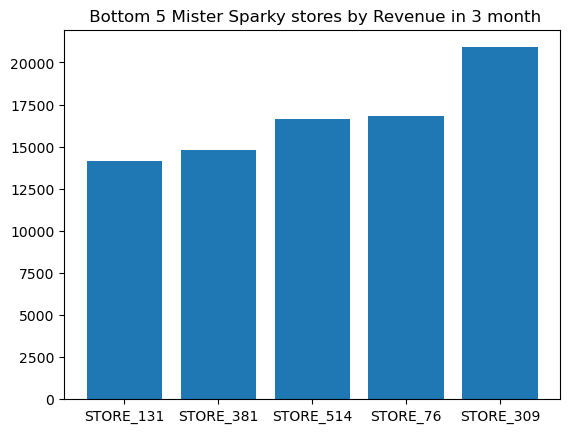

131    14158
381    14787
514    16654
76     16834
309    20903
Name: Total_Revenue_3mo, dtype: int64


In [30]:
def brandbotttom(state,time):
    topp=rev
    if time==1:
        topp=bottom12
        name="Total_Revenue_12mo"
        title=f" Bottom 5 {state} stores by Revenue in 12 month"
    if time==2:
        topp=bottom6
        name="Total_Revenue_6mo"
        title=f" Bottom 5 {state} stores by Revenue in 6 month"
    if time==3:
        topp=bottom3
        name="Total_Revenue_3mo"
        title=f" Bottom 5 {state} stores by Revenue in 3 month"
    if time==4:
        topp=bottom1
        name="Total_Revenue_month"
        title=f" Bottom 5 {state} stores by Revenue in 1 month"
    if time==5:
        topp=bottomc
        name="Total_Revenue_current"
        title=f" Bottom 5 {state} stores by Revenue currently"
    topp=topp[topp["Brand"]==state]
    topp=topp.head()
    plt.bar(topp["Store_ID"],topp[name])
    plt.title(title)
    plt.show()
    print(topp[name])


brandbotttom("Mister Sparky",3)

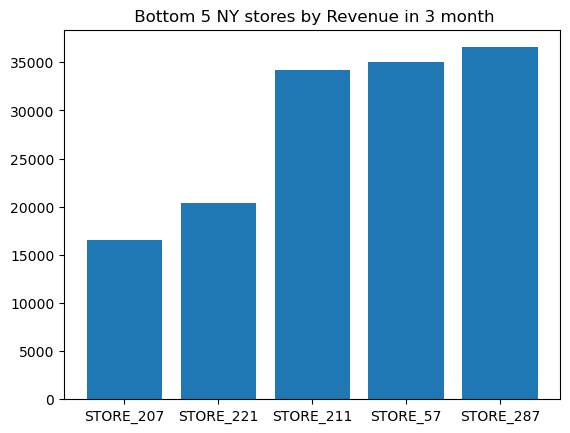

207    16563
221    20426
211    34194
57     34996
287    36558
Name: Total_Revenue_3mo, dtype: int64


In [31]:
def statebottom(state,time):
    topp=rev
    if time==1:
        topp=bottom12
        name="Total_Revenue_12mo"
        title=f" Bottom 5 {state} stores by Revenue in 12 month"
    if time==2:
        topp=bottom6
        name="Total_Revenue_6mo"
        title=f" Bottom 5 {state} stores by Revenue in 6 month"
    if time==3:
        topp=bottom3
        name="Total_Revenue_3mo"
        title=f" Bottom 5 {state} stores by Revenue in 3 month"
    if time==4:
        topp=bottom1
        name="Total_Revenue_month"
        title=f" Bottom 5 {state} stores by Revenue in 1 month"
    if time==5:
        topp=bottomc
        name="Total_Revenue_current"
        title=f" Bottom 5 {state} stores by Revenue currently"
    topp=topp[topp["State"]==state]
    topp=topp.head()
    plt.bar(topp["Store_ID"],topp[name])
    plt.title(title)
    plt.show()
    print(topp[name])


statebottom("NY",3)

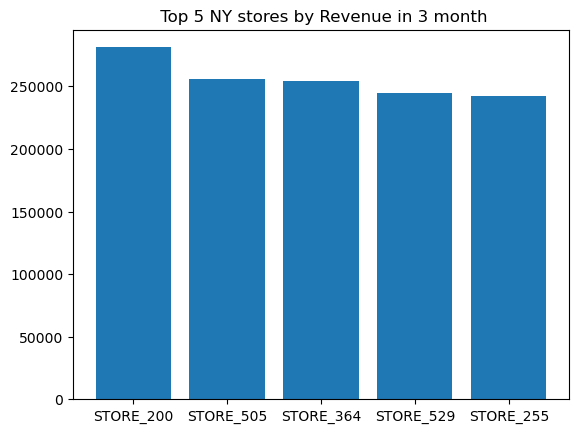

200    281188
505    256027
364    253907
529    244537
255    242033
Name: Total_Revenue_3mo, dtype: int64


In [32]:
def statetop(state,time):
    topp=rev
    if time==1:
        topp=top12
        name="Total_Revenue_12mo"
        title=f" Top 5 {state} stores by Revenue in 12 month"
    if time==2:
        topp=top6
        name="Total_Revenue_6mo"
        title=f" Top 5 {state} stores by Revenue in 6 month"
    if time==3:
        topp=top3
        name="Total_Revenue_3mo"
        title=f" Top 5 {state} stores by Revenue in 3 month"
    if time==4:
        topp=topm
        name="Total_Revenue_month"
        title=f" Top 5 {state} stores by Revenue in 1 month"
    if time==5:
        topp=topc
        name="Total_Revenue_current"
        title=f" Top 5 {state} stores by Revenue currently"
    topp=topp[topp["State"]==state]
    topp=topp.head()
    plt.bar(topp["Store_ID"],topp[name])
    plt.title(title)
    plt.show()
    print(topp[name])


statetop("NY",3)

C:\Users\silve\AppData\Local\Temp\ipykernel_9504\3493298124.py:24: FutureWarning:

The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.



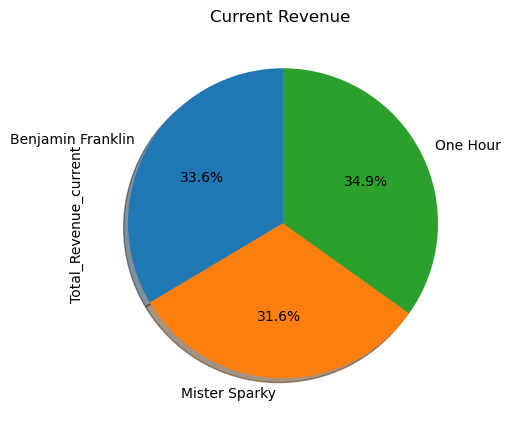

In [33]:
def pies(option,time):
    topp=rev
    if time==1:
        topp=top12
        name="Total_Revenue_12mo"
        title="  Revenue in 12 month"
    if time==2:
        topp=top6
        name="Total_Revenue_6mo"
        title=" Revenue in 6 month"
    if time==3:
        topp=top3
        name="Total_Revenue_3mo"
        title=" Revenue in 3 month"
    if time==4:
        topp=topm
        name="Total_Revenue_month"
        title="Revenue in 1 month"
    if time==5:
        topp=topc
        name="Total_Revenue_current"
        title="Current Revenue "
    topp=topp[[option,name]]
    topp=topp.groupby(option,axis=0).sum()
    topp[name].plot(kind='pie', figsize=(5,6),
                    autopct='%1.1f%%',
                   startangle=90,
                   shadow=True)
    plt.title(title)
    plt.show()

pies("Brand",5)

In [ ]:
# the below 6 are callable object if nedded. 

In [34]:
def lined(store):
    line=store
    chop=rev.iloc[line]	
    return chop


In [ ]:
def lines(store):
    line=store
    chop=rev.iloc[line]	
    revenue={"Revenue":[chop["Total_Revenue_current"],chop["Total_Revenue_month"],chop["Total_Revenue_3mo"],
            chop["Total_Revenue_6mo"],chop["Total_Revenue_12mo"]],"Time":["Current ","1mo","3mo","6mo","12mo"]}
    fig=px.line(revenue,x="Time",y="Revenue")
    return fig

In [ ]:
def top():
    topp=top12
    name="Total_Revenue_12mo"
    title="Top 5 stores by Revenue in 12 month"
    topp=topp.head()
    fig=px.bar(topp,x="Store_ID",y="Total_Revenue_12mo")
    fig.update_layout(title=title)
    return fig

In [ ]:
def bottom():
    topp=bottom12
    name="Total_Revenue_12mo"
    title=" Bottom 5 stores by Revenue in 12 month"
    topp=topp.head()
    fig=px.bar(topp,x="Store_ID",y="Total_Revenue_12mo")
    fig.update_layout(title=title)
    return fig
    

In [ ]:
def pieb():
    topp=topc
    brand="Brand"
    current="Total_Revenue_current"
    title="Current Revenue "
    topp=topp[[brand,current]]
    topp=topp.groupby(brand).sum().reset_index()
    fig=px.pie(topp, names="Brand", values="Total_Revenue_current",hole=0) 
    fig.update_traces(textinfo='percent+label',
                      pull=[0.05]*len(topp))
    fig.update_layout(title=title, height=600, width=500)
    return fig

In [ ]:
def pies():
    topp=rev
    topp=topc
    brand="State"
    current="Total_Revenue_current"
    title="Current Revenue "
    topp=topp[[brand,current]]
    topp=topp.groupby(brand).sum().reset_index()
    fig=px.pie(topp, names="State", values="Total_Revenue_current",hole=0) 
    fig.update_traces(textinfo='percent+label',
                      pull=[0.05]*len(topp))
    fig.update_layout(title=title, height=600, width=500)
    return fig

In [ ]:
# Dashboard to create a combined visualizaion. 

In [35]:
app=dash.Dash(__name__)
app.title="Revenue Dashboard"

In [36]:

app.layout=html.Div([
    html.H1("Revenue Dash Board"),
    html.Label("Choose a Type of Revenue for Visualization"),
    dcc.Dropdown(
        id="column-dropdown",
        options=[
            {"label":"Top5","value":1},
            {"label":"Bottom5","value":2},
            {"label":"Brands","value":3},
            {"label":"State","value":4}
            ],
        value=1
    ),

    dcc.Graph(id="eda-graph"),

    html.Label("Type in Store number for more information "),    
    dcc.Input(
        id="Number-Input",
        type="number",
        value=1,
        step=1,
        min=1,
        max=600
    ),
    dcc.Graph(id="Store-number"),
    html.Div(id="store-info",style={
    "fontSize": "20px",     # bigger font size
    "textAlign": "center",  # center horizontally
    "whiteSpace": "pre-wrap"  # preserves line breaks nicely
})
])

In [37]:
@app.callback(
    Output("eda-graph","figure"),
    Output("Store-number","figure"),
    Output("store-info", "children"),
    Input("column-dropdown","value"),
    Input("Number-Input","value")      
)
def update_figure(Revenue_Type,number):
    chop=rev.iloc[number]	
    revenue={"Revenue":[chop["Total_Revenue_current"],chop["Total_Revenue_month"],chop["Total_Revenue_3mo"],
            chop["Total_Revenue_6mo"],chop["Total_Revenue_12mo"]],"Time":["Current ","1mo","3mo","6mo","12mo"]}
    fig1=px.line(revenue,x="Time",y="Revenue")
    
    if Revenue_Type==1:
        fig2=px.bar(top12,x="Store_ID",y="Total_Revenue_12mo")
    elif Revenue_Type==2:
        fig2=px.bar(bottom12,x="Store_ID",y="Total_Revenue_12mo")
    elif Revenue_Type==3:
        topp=rev[["Brand","Total_Revenue_current"]]
        topp=topp.groupby("Brand").sum().reset_index()
        fig2=px.pie(topp, names="Brand", values="Total_Revenue_current",hole=0) 
    elif Revenue_Type==4:
        topp=rev[["State","Total_Revenue_current"]]
        topp=topp.groupby("State").sum().reset_index()
        fig2=px.pie(topp, names="State", values="Total_Revenue_current",hole=0) 
    else:
        fig2=fig1

    info_lines = [f"{key}: {value}" for key, value in chop.items()]
    fig3 = html.Pre("\n".join(info_lines)) 
        
    return fig2,fig1,fig3

app.run_server(port=8052,mode="external")
